## Problem Statement
Develop a sentiment analysis model to classify reviews as positive or negative . Preprocess the review text using techniques such as lower casing, removing stop words and lemmatization and also use trained model accurately predict the sentiment of new , unseen reviews.

In [1]:
import pandas as pd

In [2]:
df=pd.read_excel("C:\\Users\\HEMANTH KUMAR\\Downloads\\Reviews.xlsx")

In [3]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
#we can review the 5 rows
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
#retrun last 5 rows
df.tail(10)

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  996 non-null    object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
df.isnull().sum()

Review    4
Liked     0
dtype: int64

In [8]:
df.dropna()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [10]:
import seaborn as sb
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

In [11]:
combine_text = " ".join(df['Review'].astype(str)) #combine all review text into string

In [12]:
wordcloud=WordCloud(width=800,height=400,background_color = 'white').generate(combine_text)

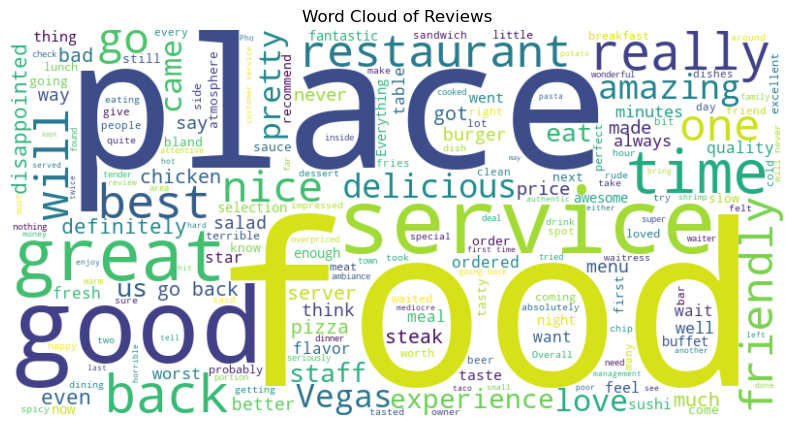

In [13]:
#plot the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [14]:
from collections import Counter

In [15]:
target_words=['good','great','amazing','bad','worst','pretty','friendly']
allwords=" ".join(df['Review'].astype(str)).split()
words_count=Counter(allwords)
target_count={word:words_count[word] for word in target_words}

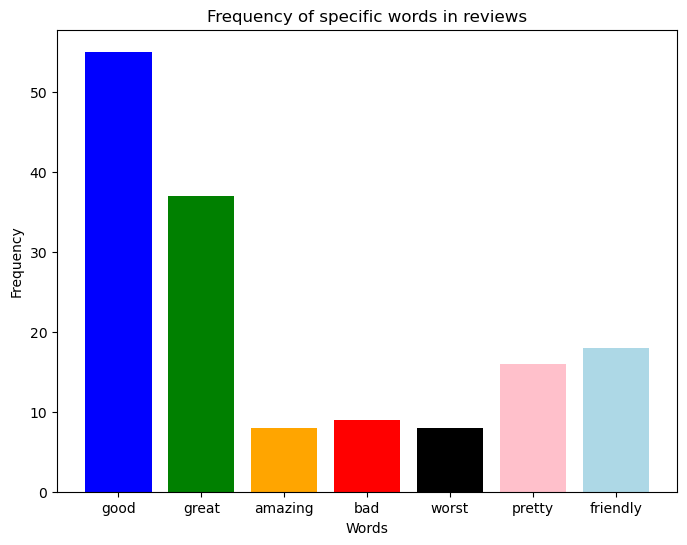

In [16]:
plt.figure(figsize=(8,6))
plt.bar(target_count.keys(),target_count.values(),color=['blue','green','orange','red','black','pink','lightblue'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of specific words in reviews')
plt.show()

In [17]:
#text preprocessing 

In [18]:
#we covert a dataset into lowercase
lowercase_txt=df['Review'].str.lower()
lowercase_txt

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [19]:
###Tokenization
#it is the process of breaking down a pice of text into smaller units

In [20]:
from nltk.tokenize import word_tokenize

In [21]:
df['Review'] = df['Review'].astype(str)
df['Tokens']=df['Review'].apply(word_tokenize)

In [22]:
print(df['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [24]:
#Removing Stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [25]:
# Get the English stopwords and convert them to a set
stopwords_set = set(stopwords.words('english'))


In [26]:
# Assuming your DataFrame is named df and has a column named 'Review'
df['Review'] = df['Review'].astype(str)

df['Tokens'] = df['Review'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word not in stopwords_set])

print(df['Tokens'])


0                            [wow, ..., loved, place, .]
1                                       [crust, good, .]
2                             [tasty, texture, nasty, .]
3      [stopped, late, may, bank, holiday, rick, stev...
4                    [selection, menu, great, prices, .]
                             ...                        
995           [think, food, flavor, texture, lacking, .]
996                       [appetite, instantly, gone, .]
997             [overall, impressed, would, go, back, .]
998    [whole, experience, underwhelming, ,, think, '...
999    [,, n't, wasted, enough, life, ,, poured, salt...
Name: Tokens, Length: 1000, dtype: object


In [27]:
#stemming
#it is the process of reducing words to its baase or root form
from nltk.stem import PorterStemmer

In [28]:
stemmer=PorterStemmer()

In [29]:
df['Stemmed']=df['Review'].apply(lambda x:' '.join(stemmer.stem(word) for word in word_tokenize(x)))

In [30]:
print(df['Stemmed'])

0                               wow ... love thi place .
1                                    crust is not good .
2               not tasti and the textur wa just nasti .
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                             appetit instantli gone .
997      overal i wa not impress and would not go back .
998    the whole experi wa underwhelm , and i think w...
999    then , as if i had n't wast enough of my life ...
Name: Stemmed, Length: 1000, dtype: object


In [31]:
df['Stemmed'].value_counts()

Stemmed
nan                                                                                                                                    4
the food wa terribl .                                                                                                                  2
i would not recommend thi place .                                                                                                      2
i love thi place .                                                                                                                     2
i wo n't be back .                                                                                                                     2
                                                                                                                                      ..
omg , the food wa delicioso !                                                                                                          1
there is noth authent about thi p

In [32]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [33]:
lemmatizer=WordNetLemmatizer()

In [34]:
df['Lemmatized'] = df['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word,pos=wordnet.VERB) for word in word_tokenize(x)]))

In [35]:
print(df['Lemmatized'])

0                             Wow ... Loved this place .
1                                    Crust be not good .
2              Not tasty and the texture be just nasty .
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                              Appetite instantly go .
997     Overall I be not impress and would not go back .
998    The whole experience be underwhelming , and I ...
999    Then , as if I have n't waste enough of my lif...
Name: Lemmatized, Length: 1000, dtype: object


In [36]:
#Remove numbers

In [37]:
import re
df['No_num']=df['Review'].apply(lambda x :re.sub(r'\d+','',x))

In [38]:
df['No_num']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: No_num, Length: 1000, dtype: object

In [39]:
df['Cleaned']=df['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]','',x))

In [40]:
df['Cleaned']

0                                   Wow Loved this place
1                                      Crust is not good
2               Not tasty and the texture was just nasty
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                              Appetite instantly gone
997    Overall I was not impressed and would not go back
998    The whole experience was underwhelming and I t...
999    Then as if I hadnt wasted enough of my life th...
Name: Cleaned, Length: 1000, dtype: object

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Review      1000 non-null   object
 1   Liked       1000 non-null   int64 
 2   Tokens      1000 non-null   object
 3   Stemmed     1000 non-null   object
 4   Lemmatized  1000 non-null   object
 5   No_num      1000 non-null   object
 6   Cleaned     1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [42]:
df

,Review,Liked,Tokens,Stemmed,Lemmatized,No_num,Cleaned
0,Wow... Loved this place.,1,"[wow, ..., loved, place, .]",wow ... love thi place .,Wow ... Loved this place .,Wow... Loved this place.,Wow Loved this place
1,Crust is not good.,0,"[crust, good, .]",crust is not good .,Crust be not good .,Crust is not good.,Crust is not good
2,Not tasty and the texture was just nasty.,0,"[tasty, texture, nasty, .]",not tasti and the textur wa just nasti .,Not tasty and the texture be just nasty .,Not tasty and the texture was just nasty.,Not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,"[stopped, late, may, bank, holiday, rick, stev...",stop by dure the late may bank holiday off ric...,Stopped by during the late May bank holiday of...,Stopped by during the late May bank holiday of...,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...,1,"[selection, menu, great, prices, .]",the select on the menu wa great and so were th...,The selection on the menu be great and so be t...,The selection on the menu was great and so wer...,The selection on the menu was great and so wer...
...,...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,"[think, food, flavor, texture, lacking, .]",i think food should have flavor and textur and...,I think food should have flavor and texture an...,I think food should have flavor and texture an...,I think food should have flavor and texture an...
996,Appetite instantly gone.,0,"[appetite, instantly, gone, .]",appetit instantli gone .,Appetite instantly go .,Appetite instantly gone.,Appetite instantly gone
997,Overall I was not impressed and would not go b...,0,"[overall, impressed, would, go, back, .]",overal i wa not impress and would not go back .,Overall I be not impress and would not go back .,Overall I was not impressed and would not go b...,Overall I was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,"[whole, experience, underwhelming, ,, think, '...","the whole experi wa underwhelm , and i think w...","The whole experience be underwhelming , and I ...","The whole experience was underwhelming, and I ...",The whole experience was underwhelming and I t...


In [43]:
#Normalization 
import contractions
df['Expanded']=df['Review'].apply(contractions.fix)

In [44]:
df['Expanded']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I had not wasted enough of my life...
Name: Expanded, Length: 1000, dtype: object

In [45]:
#Removing Emojis

In [46]:
import emoji
df['Emoji']=df['Review'].apply(emoji.demojize)

In [47]:
df['Emoji']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Emoji, Length: 1000, dtype: object

In [48]:
from bs4 import BeautifulSoup

In [49]:
df['Clean']=df['Review'].apply(lambda x:BeautifulSoup(x,'html.parser').get_text())

C:\Users\HEMANTH KUMAR\AppData\Local\Temp\ipykernel_16280\2384465390.py:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['Clean']=df['Review'].apply(lambda x:BeautifulSoup(x,'html.parser').get_text())


In [50]:
df['Clean']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Clean, Length: 1000, dtype: object

In [51]:
##### TF IDF vectorizer -it converts text document into matrices format
##### TF=Term frequency ,IDF=Inverse Document Frequency

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
vectorizer=TfidfVectorizer()

In [54]:
x=vectorizer.fit_transform(df['Review'])
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [56]:
vectorizer=TfidfVectorizer()

In [57]:
X=vectorizer.fit_transform(df['Review'])
y=df['Liked']

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [59]:
print(x_train,x_test,y_train,y_test)

  (0, 63)	0.08942487588523815
  (0, 1778)	0.07703016388246013
  (0, 1963)	0.32615800998126926
  (0, 1812)	0.11540291073969666
  (0, 1225)	0.19721792376581446
  (0, 1743)	0.2615223460316776
  (0, 1784)	0.18491853710864656
  (0, 699)	0.13997573358295093
  (0, 155)	0.15836125038597593
  (0, 1952)	0.3059451621103631
  (0, 1125)	0.21699665215388375
  (0, 54)	0.27885735790124266
  (0, 1550)	0.2615223460316776
  (0, 1924)	0.2492229593745097
  (0, 1926)	0.2615223460316776
  (0, 694)	0.2693172124403987
  (0, 1795)	0.30849175642797566
  (0, 1889)	0.30849175642797566
  (1, 1161)	0.23417402978179477
  (1, 579)	0.40613997992782436
  (1, 1029)	0.3397566532490546
  (1, 1747)	0.36824322551302624
  (1, 256)	0.40613997992782436
  (1, 489)	0.38444638515946505
  (1, 517)	0.4652165920931802
  :	:
  (697, 1911)	0.46801741316672485
  (698, 63)	0.09941818111459709
  (698, 1938)	0.2228482091437908
  (698, 944)	0.14171411086951774
  (698, 1776)	0.1774987010047913
  (698, 1206)	0.14757149730549846
  (698, 890)	0

In [60]:
print(x_test.shape)

(300, 2033)


In [61]:
print(y_test.shape)

(300,)


In [62]:
model=MultinomialNB()
model.fit(x_train,y_train)


MultinomialNB()

In [63]:
y_predict=model.predict(x_test)

In [64]:
acc=accuracy_score(y_test,y_predict)
report=classification_report(y_test,y_predict)

In [65]:
print(f'Accuracy:{acc*100}')
print(report)

Accuracy:81.0
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       152
           1       0.81      0.80      0.81       148

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



In [66]:
### Comparison

In [67]:
mod=LogisticRegression()
mod.fit(x_train,y_train)
y_predict=mod.predict(x_test)
acc=accuracy_score(y_test,y_predict)
report=classification_report(y_test,y_predict)
print(f'Accuracy:{acc*100}')
print(report)

Accuracy:80.66666666666666
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       152
           1       0.82      0.78      0.80       148

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



In [68]:
print(report)

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       152
           1       0.82      0.78      0.80       148

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



In [69]:
#prediction on new review
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string 

In [70]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

In [71]:
new_reviews =["the food is bad😢"]

In [72]:
# Apply preprocessing to each review individually
preprocessed_reviews = [preprocess_text(review) for review in new_reviews]

In [73]:
# Transform the new reviews
x_new = vectorizer.transform(preprocessed_reviews)

# Predict sentiment for each preprocessed review
for review in preprocessed_reviews:
    sentiment = model.predict(x_new)
    sentiment_label = 'positive' if sentiment == 1 else 'negative'
    print(f'Review: {review}\nSentiment: {sentiment_label}\n')


Review: food bad😢
Sentiment: negative



### Saving trained model

In [74]:
import pickle
filename="Trained.pkl"
pickle.dump(model,open(filename,'wb'))

### Loading the model to predict

In [75]:
load_model=pickle.load(open("C:\\Users\\HEMANTH KUMAR\\Sentiment Analysis\\Trained.pkl",'rb'))

In [76]:
x_new=x_test[19]

In [77]:
print(y_test.iloc[19])

1


In [78]:
prediction = model.predict(x_new)
print(prediction[0])
if prediction[0]==0:
    print('Negative')
else:
    print('Positive')

1
Positive


#### Model To Predict New file

In [81]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Fit the vectorizer on the training data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Review'])
y = df['Liked']  # Assuming 'Liked' is the target column

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = MultinomialNB()
model.fit(x_train, y_train)

# Save the fitted vectorizer and the trained model
with open('Vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)

with open('Trained.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
import string

# Function to preprocess new data
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# Load the fitted vectorizer and trained model
with open('Vectorizer.pkl', 'rb') as vec_file:
    vectorizer = pickle.load(vec_file)

with open('Trained.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load the new CSV file
new_data = pd.read_csv("C:\\Users\\HEMANTH KUMAR\\OneDrive\\Desktop\\Sentiment Analysis Project\\IMDB Dataset.csv")

# Preprocess the reviews in the new data
new_data['Processed_Review'] = new_data['review'].apply(preprocess_text)

# Transform the new reviews using the loaded vectorizer
X_new = vectorizer.transform(new_data['Processed_Review'])

# Predict sentiment
new_data['Outcome'] = model.predict(X_new)
new_data['Sentiment_Label'] = new_data['Outcome'].apply(lambda x: 'positive' if x == 1 else 'negative')
# Save the predictions to a new CSV file
new_data.to_csv('predictions.csv', index=False)
